Parcial 3:
- Problema 2 (cadena de produccion):

a) Variables observables:

si el producto esta o no en la estacion de produccion, en la estacion de empaque y si ha sido enviado al mercado.

b) $S=\{S_1,S_2,S_3\}$ tal que $S_1 := \text{"Estacion de produccion"}$, $S_2 := \text{"Estacion de empaque"}$, $S_3 := \text{"Mercado"}$

In [591]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib

In [592]:
# C) Matriz de transicion
M = np.array([[0.1, 0.9, 0.0],[0.0, 0.05, 0.95], [0.0, 0.0, 1.0]])

(d) Encuentre el estado estable tanto algebraicamente como numericamente

Dado $\pi\Bbb{P}=\pi$ con $\Bbb{P}$ la matriz de transicion:
$$
\Bbb{P}=
\begin{pmatrix}
0.1 & 0.9 & 0.0 \\
0.0 & 0.5 & 0.95 \\
0.0 & 0.0 & 1.0 \\
\end{pmatrix}
$$
Y los estados $\pi=\begin{pmatrix}\pi_1 & \pi_2 & \pi_3\end{pmatrix}$ tal que $\pi_1+\pi_2+\pi_3=1$.
Asi aque
$$
\begin{pmatrix}\pi_1 & \pi_2 & \pi_3\end{pmatrix} =
\begin{pmatrix}\pi_1 & \pi_2 & \pi_3\end{pmatrix}
\begin{pmatrix}
0.1 & 0.9 & 0.0 \\
0.0 & 0.5 & 0.95 \\
0.0 & 0.0 & 1.0 \\
\end{pmatrix}
$$
Simplificando,
$$
\left\{
\begin{array}{l}
\pi_1 = 0.1\pi_1\\
\pi_2 = 0.9\pi_1+0.5\pi_2\\
\pi_3 = 0.95\pi_2+1.0\pi_3\\
\end{array}
\right.
$$
Entonces $\begin{pmatrix}\pi_1 & \pi_2 & \pi_3\end{pmatrix} =\begin{pmatrix}0.0 & 0.0 & 1.0\end{pmatrix}$. Por lo que despues de cierto numero de procesos la distribucion de estados permanecera estacionaria y, en este caso, todos los productos terminaran en el mercado y ninguno en la estacion de produccion o empaque.

In [605]:
A = np.transpose(M) - np.eye(3)
A[-1, :] = 1
b = np.array([0, 0, 1])
pi = np.linalg.solve(A, b)
pi

array([ 0., -0.,  1.])

In [606]:
print('La probabilidad en estado estable de que ambas estaciones esten ocupadas al mismo tiempo: ', pi[0] * pi[1]*100)
print('La probabilidad en estado estable de que al menos una estacion este ocupada: ', (pi[0] + pi[1])*100)
print('La probabilidad en estado estable de que la estacion de produccion este vacia: ', (1-pi[0])*100)

La probabilidad en estado estable de que ambas estaciones esten ocupadas al mismo tiempo:  -0.0
La probabilidad en estado estable de que al menos una estacion este ocupada:  0.0
La probabilidad en estado estable de que la estacion de produccion este vacia:  100.0


In [607]:
#3)
M2 = np.array([[0.1, 0.9, 0.0],[0.0, 0.05, 0.95], [0.02, 0.0, 0.98]])
A = np.transpose(M2) - np.eye(3)
A[-1, :] = 1
b = np.array([0, 0, 1])
pi2 = np.linalg.solve(A, b)
pi2

array([0.02130045, 0.02017937, 0.95852018])

In [609]:
print('La probabilidad en estado estable de que ambas estaciones esten ocupadas al mismo tiempo: ', pi2[0] * pi2[1]*100)
print('La probabilidad en estado estable de que al menos una estacion este ocupada: ', (pi2[0] + pi2[1])*100)
print('La probabilidad en estado estable de que la estacion de produccion este vacia: ', (1-pi2[0])*100)

La probabilidad en estado estable de que ambas estaciones esten ocupadas al mismo tiempo:  0.04298296768485203
La probabilidad en estado estable de que al menos una estacion este ocupada:  4.147982062780276
La probabilidad en estado estable de que la estacion de produccion este vacia:  97.86995515695067


In [597]:
#4. (Tiempo de escape de un foton del sol)
#a)
def Get_photons(N=1000):
    photons = np.zeros(N)
    for i in range(N):
        path = False
        n = 0
        x, y, z = 0., 0., 0.
        while not path:
            theta = np.random.uniform(0,np.pi)
            phi = np.random.uniform(0,2*np.pi)
            x += 0.1*np.sin(theta)*np.cos(phi)
            y += 0.1*np.sin(theta)*np.sin(phi)
            z += 0.1*np.cos(theta)
            if np.sqrt(x**2 + y**2 + z**2 > 1): 
                path = True
            else:
                n += 1
        photons[i] = n
    return photons


<BarContainer object of 19 artists>

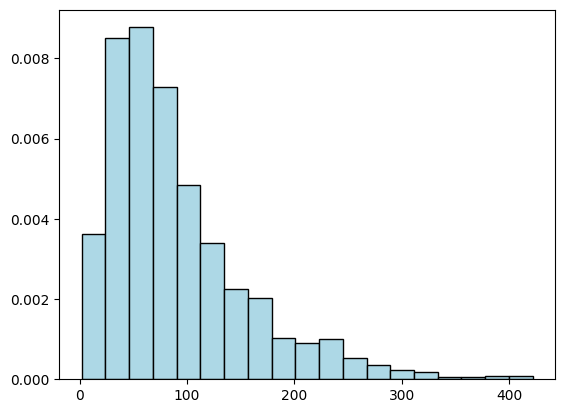

In [598]:
Photons = Get_photons()
x = np.linspace(np.min(Photons),np.max(Photons),20)
h,bins = np.histogram(Photons,bins=x)
w = np.diff(bins)
I = np.sum(w*h)
hnorm = h/I
plt.bar(bins[:-1],hnorm,color='#add8e6',width=w,ec='k')

In [599]:
#e)
print('Calcule el valor esperado del numero de pasos que le toma al foton escapar:', (h/1000)@bins[:-1])
#f)
print('Verifique que el numero medio de pasos medio es aproximadamente E(n)=', (1/0.1)**2)

Calcule el valor esperado del numero de pasos que le toma al foton escapar: 90.61157894736841
Verifique que el numero medio de pasos medio es aproximadamente E(n)= 100.0


¿Cuantos años le toma al foton escapar?
$$
\bar{T}=\frac{R^2_s}{lc}\approx\frac{(700000\,km)^2}{(6*10^{-6}\,km)(300000\,km/s)}=2.72*10^{11}\,s=8632\,y
$$

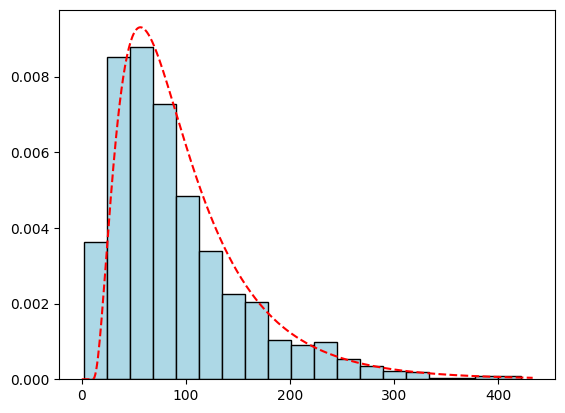

In [600]:
a,c,d,e = exponweib.fit(Photons)
plt.bar(bins[:-1],hnorm,color='#add8e6',width=w,ec='k')
W = np.linspace(0,np.max(Photons),500)
plt.plot(W, exponweib.pdf(W, a, c, d, e), '--', color = 'r')
plt.show()